In [1]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

# Reading the Datasets

In [2]:
# Reading the dataset
# India = pd.read_csv('Data/2nd May/Austria_Covid.csv')
Australia = pd.read_csv('Data/2nd May/Australia_Covid.csv')
Austria = pd.read_csv('Data/2nd May/Austria_Covid.csv')
China = pd.read_csv('Data/2nd May/China_Covid.csv')
Iceland = pd.read_csv('Data/2nd May/Iceland_Covid.csv')
India = pd.read_csv('Data/2nd May/India_Covid.csv')
Iran = pd.read_csv('Data/2nd May/Iran_Covid.csv')
New_Zealand = pd.read_csv('Data/2nd May/New_Zealand_Covid.csv')
S_korea = pd.read_csv('Data/2nd May/S_Korea_Covid.csv')
Switzerland = pd.read_csv('Data/2nd May/Switzerland_Covid.csv')

In [3]:
def normalize_sig(df):
    df['norm_cases'] = df['new_cases']/np.std(df['new_cases'])
    return(df)

In [4]:
frames = [China, S_korea, Iceland, New_Zealand, Switzerland, Australia, Iran, Austria, India]
for i in frames:
    i = normalize_sig(i)

# Adding Stage Column for Countries

In [5]:
frames = [China, S_korea, Iceland, New_Zealand, Switzerland, Australia, Iran, Austria]
data = pd.concat(frames)


In [6]:
India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 20 columns):
Unnamed: 0                       55 non-null int64
Date                             55 non-null object
location                         55 non-null object
new_cases                        55 non-null int64
new_deaths                       55 non-null int64
total_cases                      55 non-null int64
total_deaths                     55 non-null int64
total_tests                      55 non-null float64
Lockdown                         55 non-null float64
Public_Health                    55 non-null float64
Governance_and_socio-economic    55 non-null float64
Humanitarian_exemption           55 non-null float64
Social_distancing                55 non-null float64
Movement_restrictions            55 non-null float64
Day                              55 non-null int64
Month                            55 non-null int64
Weekday                          55 non-null int64
Year          

In [7]:
data = data.drop('Unnamed: 0', axis = 1)

In [8]:
#data = pd.concat([data,dummy], axis = 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 56
Data columns (total 19 columns):
Date                             538 non-null object
location                         538 non-null object
new_cases                        538 non-null int64
new_deaths                       538 non-null int64
total_cases                      538 non-null int64
total_deaths                     538 non-null int64
total_tests                      538 non-null float64
Lockdown                         538 non-null float64
Public_Health                    538 non-null float64
Governance_and_socio-economic    538 non-null float64
Humanitarian_exemption           538 non-null float64
Social_distancing                538 non-null float64
Movement_restrictions            538 non-null float64
Day                              538 non-null int64
Month                            538 non-null int64
Weekday                          538 non-null int64
Year                             538 non-null in

In [10]:
# Plotting the Confirmed Cases with Date
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, label):
    sns.set(rc = {'figure.figsize':(11,4)})
    df[label].plot(linewidth = 3, color = 'purple')

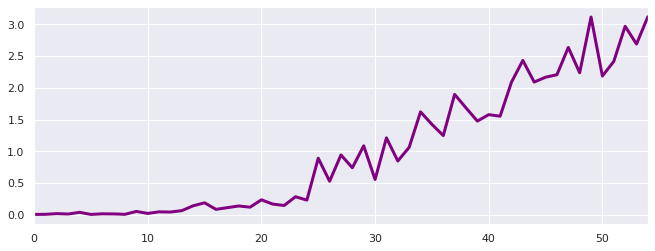

In [11]:
plot_data(India, 'norm_cases')

In [12]:
India

,Unnamed: 0,Date,location,new_cases,new_deaths,total_cases,total_deaths,total_tests,Lockdown,Public_Health,Governance_and_socio-economic,Humanitarian_exemption,Social_distancing,Movement_restrictions,Day,Month,Weekday,Year,days_completed,norm_cases
0,0,2020-03-07,India,2,0,31,0,3.0,0.0,97.0,0.0,0.0,3.0,11.0,7,3,5,2020,1,0.003132
1,1,2020-03-08,India,3,0,34,0,10.0,0.0,100.0,0.0,0.0,4.0,12.0,8,3,6,2020,2,0.004698
2,2,2020-03-10,India,10,0,44,0,6.0,0.0,104.0,0.0,0.0,5.0,14.0,10,3,1,2020,3,0.015660
3,3,2020-03-11,India,6,0,50,0,23.0,0.0,108.0,0.0,0.0,6.0,17.0,11,3,2,2020,4,0.009396
4,4,2020-03-12,India,23,0,73,0,2.0,0.0,112.0,0.0,0.0,7.0,20.0,12,3,3,2020,5,0.036018
5,5,2020-03-13,India,2,1,75,1,8.0,0.0,116.0,0.0,0.0,8.0,24.0,13,3,4,2020,6,0.003132
6,6,2020-03-14,India,8,1,83,2,7.0,0.0,120.0,1.0,0.0,9.0,28.0,14,3,5,2020,7,0.012528
7,7,2020-03-15,India,7,0,90,2,3.0,0.0,124.0,3.0,0.0,10.0,32.0,15,3,6,2020,8,0.010962
8,8,2020-03-16,India,3,0,93,2,32.0,1.0,128.0,5.0,0.0,11.0,36.0,16,3,0,2020,9,0.004698
9,9,2020-03-17,India,32,1,125,3,12.0,2.0,132.0,7.0,0.0,12.0,41.0,17,3,1,2020,10,0.050111


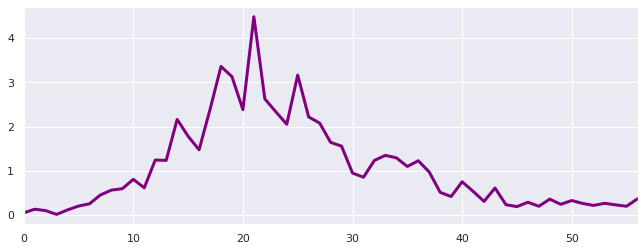

In [13]:
plot_data(Austria, 'norm_cases')

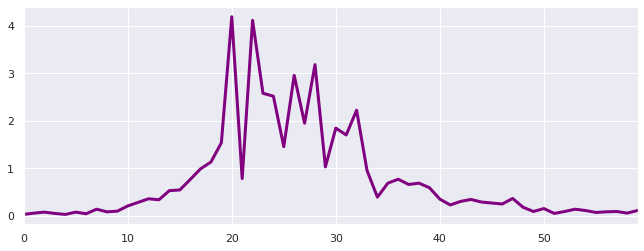

In [14]:
plot_data(Australia, 'norm_cases')

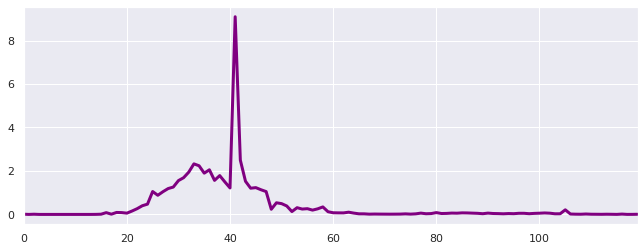

In [15]:
plot_data(China, 'norm_cases')

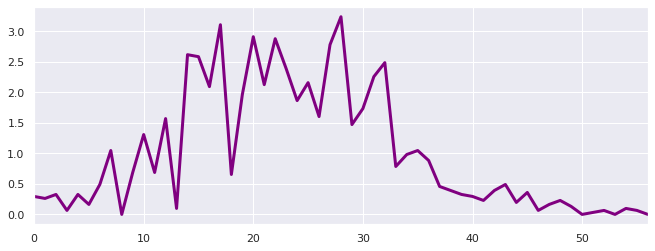

In [16]:
plot_data(Iceland, 'norm_cases')

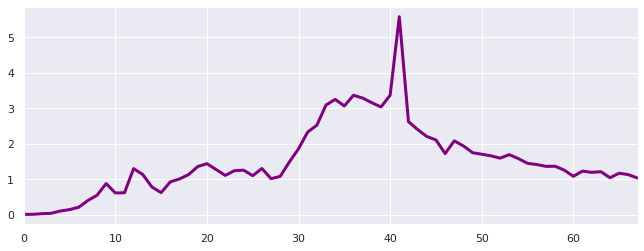

In [17]:
plot_data(Iran, 'norm_cases')

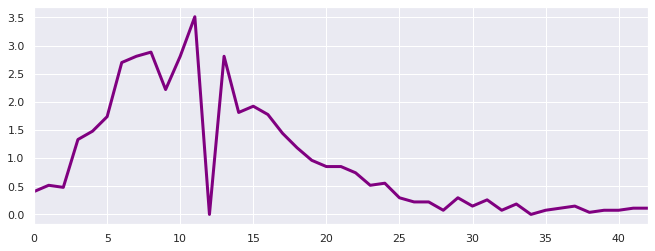

In [18]:
plot_data(New_Zealand, 'norm_cases')

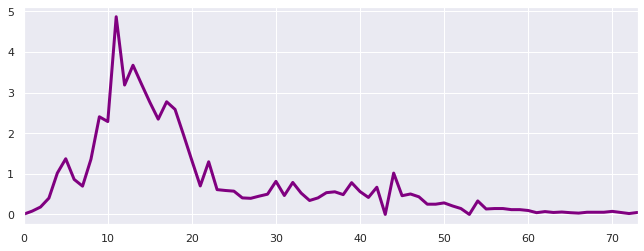

In [19]:
plot_data(S_korea, 'norm_cases')

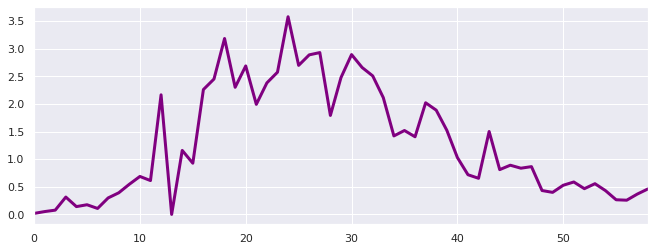

In [20]:
plot_data(Switzerland, 'norm_cases')

In [21]:
expr = """ norm_cases ~ days_completed + Weekday + Lockdown + Public_Health + Movement_restrictions + Social_distancing + total_tests"""

def train_test_split(df,ratio, expr):
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
    print('Training data set length='+str(len(df_train)))
    print('Testing data set length='+str(len(df_test)))
    
#     # Expression for the Model 
#     expr1 = """ cases cases ~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr2 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr3 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests + popData2018"""

    ## Matrix Formation
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    return X_train, y_train, X_test, y_test

def train_model(y_train, X_train):
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    print(model.summary())
    return(model)

def predict(model, X_test):
    poisson_predictions = model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
    print(predictions_summary_frame)
    return(predictions_summary_frame)
    
    
def plot_results(predictions_summary_frame,X_test, y_test, country, label):
    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test[label]
    fig = plt.figure()
    fig.suptitle(str('Predicted Mean of Covid 19 Cofirmed Cases Count'))
    predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()
    return(predicted_counts, actual_counts)
    
def plot_actual_vs_output(predicted_counts, actual_counts):
    plt.clf()
    fig = plt.figure()
    fig.suptitle('Scatter plot of Actual versus Predicted counts')
    plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
    plt.xlabel('Predicted counts')
    plt.ylabel('Actual counts')
    plt.show()

# TRAINING DATA ON WORLD

## PLOTTING THE CORRELATION GRAPH

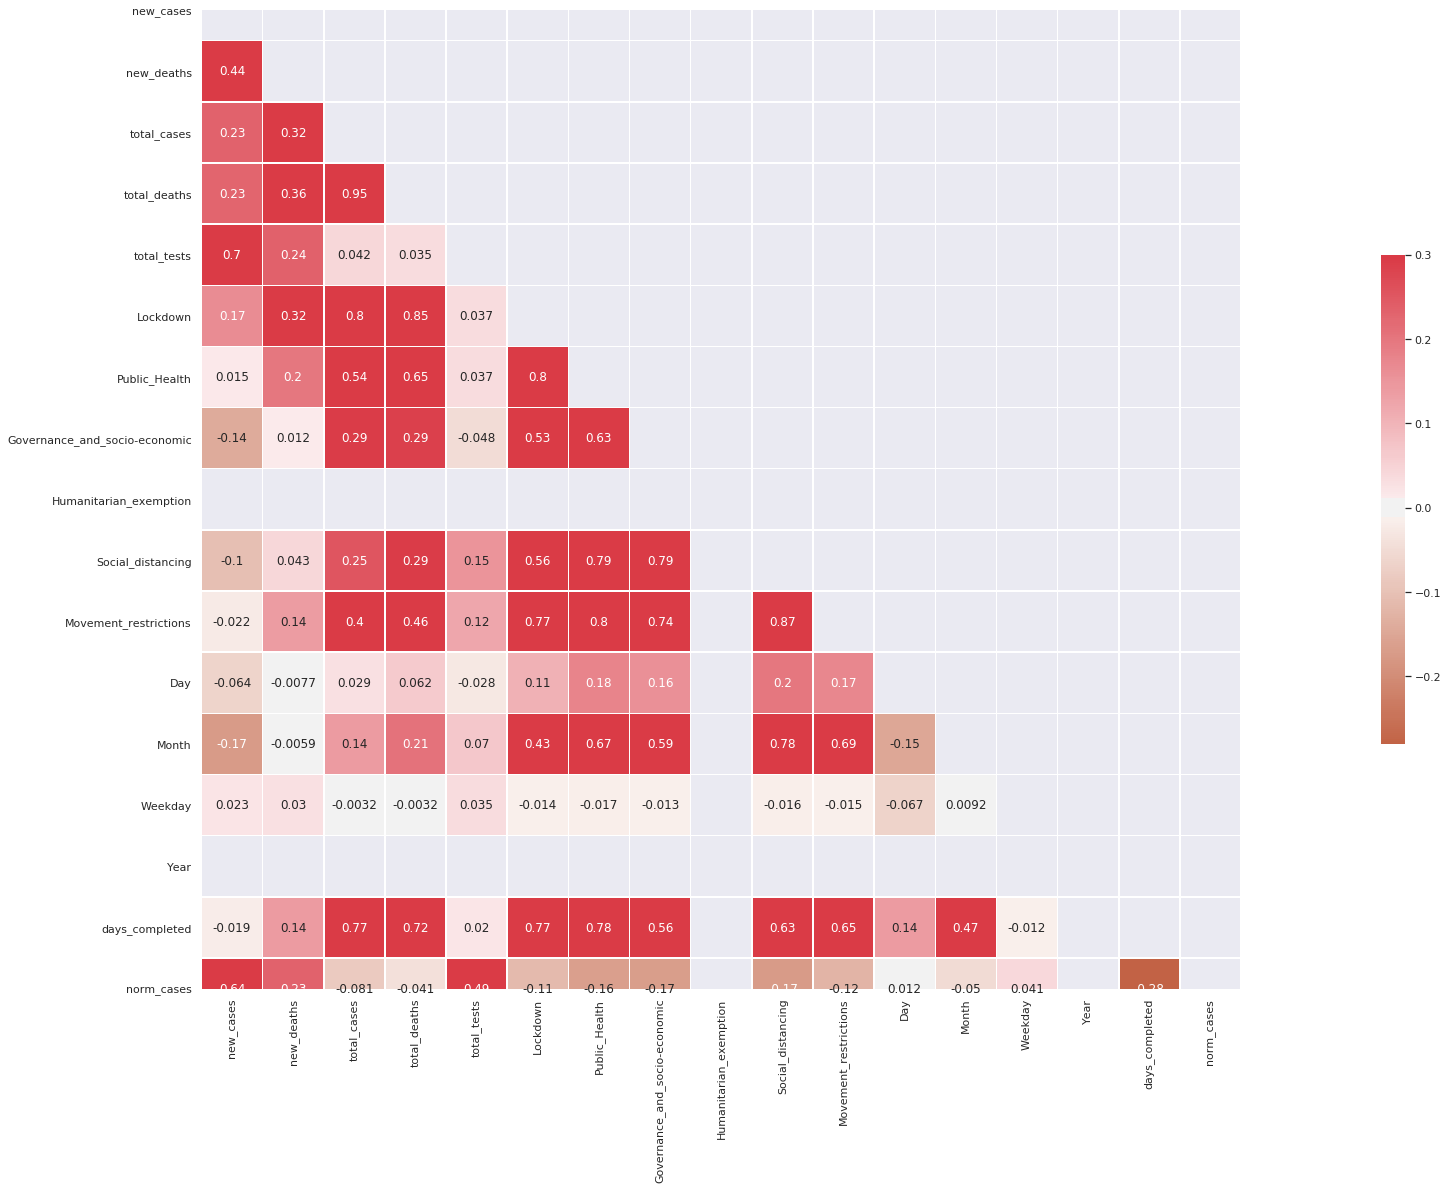

In [22]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(22, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## STEP 1: TEST-TRAIN SPLIT

In [27]:
df_filtered = data[data['days_completed'] < 59]
X_train, y_train, X_test, y_test = train_test_split(df_filtered,1, expr) 
X_India, y_India, p, q = train_test_split(India,1, expr)

Training data set length=447
Testing data set length=0
Training data set length=55
Testing data set length=0


## STEP 2: MODEL TRAINING AND SUMMARY

In [28]:
model = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             norm_cases   No. Observations:                  447
Model:                            GLM   Df Residuals:                      439
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -555.90
Date:                Sun, 03 May 2020   Deviance:                       368.25
Time:                        23:11:44   Pearson chi2:                     380.
No. Iterations:                     5   Covariance Type:             nonrobust
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0660      0.131     -0.505      0.613      -0.322       0.190
days_completed     

## STEP 3: PREDICTIONS

In [29]:
predictions_frame = predict(model, X_India)

         mean    mean_se  mean_ci_lower  mean_ci_upper
0    1.324894   0.216605       0.961655       1.825335
1    1.343784   0.232289       0.957612       1.885688
2    1.213771   0.208451       0.866868       1.699497
3    1.246105   0.215863       0.887363       1.749880
4    1.277395   0.228209       0.900030       1.812984
5    1.316963   0.249607       0.908330       1.909430
6    1.357383   0.276443       0.910642       2.023286
7    1.398879   0.308328       0.908169       2.154736
8    1.250730   0.285199       0.799959       1.955507
9    1.293712   0.296947       0.825013       2.028686
10   1.340063   0.313613       0.847071       2.119975
11   1.387094   0.334753       0.864335       2.226023
12   1.440202   0.363997       0.877588       2.363503
13   1.497397   0.398894       0.888350       2.524002
14   1.555704   0.438631       0.895221       2.703483
15   1.403215   0.413324       0.787768       2.499483
16   1.506122   0.444286       0.844826       2.685055
17   1.578

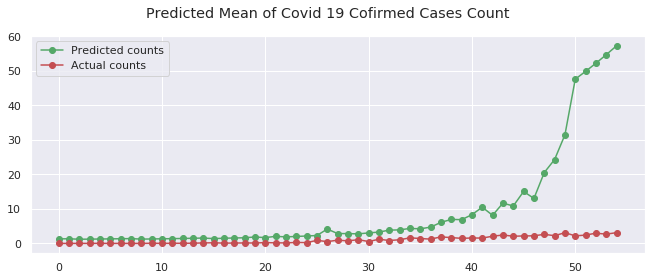

1.3248935860709758 0.003131965903322207
1.3437844566905286 0.00469794885498331
1.213770906533168 0.015659829516611035
1.2461053437490957 0.00939589770996662
1.277395423599732 0.03601760788820538
1.3169629380125838 0.003131965903322207
1.3573832499255722 0.012527863613288828
1.3988794964497677 0.010961880661627725
1.2507300029832185 0.00469794885498331
1.293712278937289 0.05011145445315531
1.3400629319820945 0.01879179541993324
1.3870943644081963 0.0438475226465109
1.4402016683292005 0.04071555674318869
1.497396922076759 0.06263931806644414
1.5557035536972044 0.13937248269783822
1.4032149277929693 0.1863519712476713
1.5061221030481902 0.08299709643803849
1.578720758180642 0.10961880661627724
1.6359702841690713 0.13624051679451601
1.865377313287556 0.11744872137458276
1.683431595827523 0.23333145979750441
2.052922497808995 0.16599419287607697
1.8958579893575718 0.1440704315528215
2.019980588758629 0.2818769312989986
2.1522295456023635 0.2286335109425211
2.293136895840365 0.88947831654350

In [30]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_India, y_India, India, 'norm_cases')
for i in range(len(predicted_counts.index)): 
    print(predicted_counts[i], actual_counts[i])